<a href="https://colab.research.google.com/github/imaansh/Real-Estate-Price-Prediction-and-Conversational-Search-System/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Real Estate Price Prediction and Conversational Search System**
The project aims to develop an AI-driven platform for the real estate market,
focusing on predicting property prices, generating automated descriptions, and enabling conversational searches.
You will generate property descriptions automatically from the data to create natural language summaries for listings.
Using the data and the descriptions,
build a conversational search interface that allows users to query properties through an AI chatbot
that works as a recommendation engine that suggests properties based on user preferences or can also answer user questions about properties.

### **Importing Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install langgraph
!pip install langchain-groq
!pip install langchain langchain_core langchain_community fastembed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55

In [6]:
!pip install -qU langchain-groq langchain langchain_core "langchain-chroma>=0.1.2" langchain_community sentence_transformers fastembed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.0/607.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

data_frame = pd.read_csv('/content/drive/MyDrive/Jazz LLM/realtor-data.zip.csv')

## PRICE PREDICTION MODEL

In [94]:
data_frame.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [95]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [96]:
data_frame.isna().sum()

,0
brokered_by,4533
status,0
price,1541
bed,481317
bath,511771
acre_lot,325589
street,10866
city,1407
state,8
zip_code,299


In [97]:
df_cleaned = data_frame.dropna()

In [98]:
col = ['brokered_by','status','prev_sold_date']
df_cleaned = df_cleaned.drop(columns=col)

In [99]:
df_cleaned.head()

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
502,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0
2270,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0
2277,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0
3409,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0
3410,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0


In [100]:
Q1 = df_cleaned['house_size'].quantile(0.25)
Q3 = df_cleaned['house_size'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_clean = df_cleaned[(df_cleaned['house_size'] >= lower_bound) & (df_cleaned['house_size'] <= upper_bound)]


Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_clean = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]


Q1 = df_cleaned['bed'].quantile(0.25)
Q3 = df_cleaned['bed'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_clean = df_cleaned[(df_cleaned['bed'] >= lower_bound) & (df_cleaned['bed'] <= upper_bound)]


Q1 = df_cleaned['bath'].quantile(0.25)
Q3 = df_cleaned['bath'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_clean = df_cleaned[(df_cleaned['bath'] >= lower_bound) & (df_cleaned['bath'] <= upper_bound)]

data_clean.head()

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
502,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0
2270,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0
3409,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0
3410,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0
3416,384900.0,3.0,2.0,0.46,1244899.0,Agawam,Massachusetts,1001.0,1476.0


In [101]:
data_clean['Log_Price'] = np.log(data_clean['price'])
data_clean['Log_House_size'] = np.log(data_clean['house_size'])

<ipython-input-101-d00f0b61d035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Log_Price'] = np.log(data_clean['price'])
<ipython-input-101-d00f0b61d035>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Log_House_size'] = np.log(data_clean['house_size'])


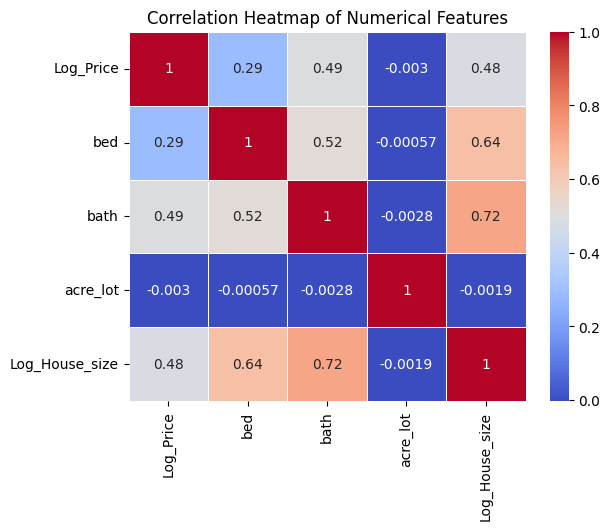

In [102]:
# Calculate the correlation matrix
corr_matrix = data_clean[['Log_Price', 'bed', 'bath', 'acre_lot', 'Log_House_size']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [103]:
df_cleaned['city'] = df_cleaned['city'].astype('category')
df_cleaned['state'] = df_cleaned['state'].astype('category')
df_cleaned['zip_code'] = df_cleaned['zip_code'].astype(int)
df_cleaned['house_size'] = df_cleaned['house_size'].astype(int)
df_cleaned['bed'] = df_cleaned['bed'].astype(int)
df_cleaned['bath'] = df_cleaned['bath'].astype(int)
df_cleaned['price'] = df_cleaned['price'].astype(float)
df_cleaned['acre_lot'] = df_cleaned['acre_lot'].astype(float)

In [104]:
label_encoder = LabelEncoder()
data_clean['city_encoded'] = label_encoder.fit_transform(data_clean['city'])

x = data_clean[['bed', 'bath', 'Log_House_size','acre_lot']]
y = data_clean['Log_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(827680, 4)
(827680,)
(206920, 4)
(206920,)


<ipython-input-104-47ae21e20848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['city_encoded'] = label_encoder.fit_transform(data_clean['city'])


In [105]:
print(data_clean)

            price  bed  bath  acre_lot     street          city  \
502      110000.0  7.0   3.0      0.09  1842706.0        Dorado   
2270     950000.0  5.0   4.0      0.99  1260473.0  Saint Thomas   
3409     525000.0  3.0   3.0      0.45  1813270.0        Agawam   
3410     289900.0  3.0   2.0      0.36  1698080.0        Agawam   
3416     384900.0  3.0   2.0      0.46  1244899.0        Agawam   
...           ...  ...   ...       ...        ...           ...   
2226377  359900.0  4.0   2.0      0.33   353094.0      Richland   
2226378  350000.0  3.0   2.0      0.10  1062149.0      Richland   
2226379  440000.0  6.0   3.0      0.50   405677.0      Richland   
2226380  179900.0  2.0   1.0      0.09   761379.0      Richland   
2226381  580000.0  5.0   3.0      0.31   307704.0      Richland   

                  state  zip_code  house_size  Log_Price  Log_House_size  \
502         Puerto Rico     949.0      1192.0  11.608236        7.083388   
2270     Virgin Islands     802.0      5000

In [106]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

In [107]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred = xg_reg.predict(x_test)
print(y_pred)
print(y_test)

[12.131165 12.999358 13.162918 ... 12.808319 13.232194 13.476484]
41020      12.765688
1518438    12.921470
1202747    14.058457
1955069    12.487485
1923149    12.548598
             ...    
2062780    13.353475
2115367    13.527828
1112960    12.149502
2012644    13.014778
1517073    13.151922
Name: Log_Price, Length: 206920, dtype: float64


In [109]:
mse = mean_squared_error(y_test, y_pred)
rse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Squared Error: {rse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.3925441186044569
Root Squared Error: 0.6265334137972666
R² Score: 0.30951790610348273


In [110]:
predicted_prices = np.exp(y_pred)
print(predicted_prices)

[185565.75 442129.53 520694.12 ... 365243.3  558044.5  712463.75]


In [111]:
def predict_price(bed, bath, house_size,acre_lot):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame([[bed, bath, house_size,acre_lot]],
                              columns=['bed', 'bath', 'Log_House_size','acre_lot'])

    # Predict using the trained model
    predicted_price = xg_reg.predict(input_data)
    predicted_price = np.exp(predicted_price)
    return predicted_price[0]

## Extracting features from query using LLM


In [303]:
# Function to extract features from the user's query using LLM
def extract_features_from_query(query):
    # Construct the prompt for the LLM
    prompt = (
        f"Extract the following property details from the user's query:\n"
        f"Query: '{query}'\n"
        f"Please extract:\n"
        f"- Number of bedrooms\n"
        f"- Number of bathrooms\n"
        f"- House size in square feet\n"
        f"- Acre lot size\n"
        f"Return the details in a structured format like a Python dictionary. Add nothing else"

    )

    # Send the prompt to the LLM
    response = model.predict(prompt)


    return response

# Example usage of the dynamic extraction
query = "I am looking for a 3-bedroom, 2-bathroom house in New York with 1500 sqft and 0.15 acre lot."
features = extract_features_from_query(query)



In [304]:
import json
def convert_output_to_dict (features):
    # Replace single quotes with double quotes
    json_string = features.replace("'", '"')

    # Handle specific cases like None, if present
    json_string = json_string.replace("None", "null")

    try:
        # Convert the string to a dictionary
        features_dict = json.loads(json_string)
        return features_dict
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
        return None


# Convert the output to a dictionary
f = convert_output_to_dict(features)

print(f)


bed = f['number_of_bedrooms']
bath = f['number_of_bathrooms']
house_size = f['house_size_in_sqft']
acre_lot = f['acre_lot_size']


{'number_of_bedrooms': 3, 'number_of_bathrooms': 2, 'house_size_in_sqft': 1500, 'acre_lot_size': 0.15}


In [305]:
bed = f['number_of_bedrooms']
bath = f['number_of_bathrooms']
house_size =f['house_size_in_sqft']
acre_lot = f['acre_lot_size']

predict_price(bed,bath,house_size,acre_lot)

437746.4

## Generating Descriptions

In [2]:
import getpass
import os
os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [7]:
from langchain_groq import ChatGroq

model = ChatGroq (
    model = "mixtral-8x7b-32768",
    temperature = 0,
    max_tokens = None,
    timeout = None,
    max_retries = 2
)

In [46]:
data_frame['description'] = ""  # Initialize an empty description column

In [21]:
def generate_description(bed, bath, house_size, acre_lot, city, price):
    # Create a prompt for the LLM
    prompt = (
        f"Generate a property description for a real estate listing:\n"
        f"This spacious {bed}-bedroom, {bath}-bathroom home is located in {city}.\n"
        f"It features a total house size of {house_size} sqft and sits on a {acre_lot} acre lot.\n"
        f"The property is listed for ${price}.\n"
        f"Write a compelling description highlighting its features and appeal."
    )

    response = model.predict(prompt)
    # Extract and return the generated description
    return response


## Creating Recommendations

In [326]:
def generate_description(row):
    return f"This spacious {row['bed']}-bed, {row['bath']}-bath home in {row['city']} features a {row['house_size']} sqft lot and is listed for ${row['price']}."

# Apply the function to generate a description for each property
data_frame['description'] = data_frame.apply(generate_description, axis=1)

# Example output
print(data_frame.head())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  \
0    Adjuntas  Puerto Rico     601.0       920.0            NaN   
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN   
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN   
3       Ponce  Puerto Rico     731.0      1800.0            NaN   
4    Mayaguez  Puerto Rico     680.0         NaN            NaN   

                                         description  
0  This spacious 3.0-bed, 2.0-bath home in Adjunt...  
1  This spacious 4.0-bed, 2.0-bath home in Adjunt...  
2  This spa

In [327]:
import pandas as pd
from langchain_groq import ChatGroq
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data_frame['description'])

In [328]:
def retrieve_properties(query, top_n=3):
    query_vector = vectorizer.transform([query])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Get top N most similar properties
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    return data_frame.iloc[top_indices]

In [329]:
def generate_recommendation_response(user_query):
    # Retrieve properties based on preferences
    recommended_properties = retrieve_properties(user_query)

    # Generate the response
    if not recommended_properties.empty:
        recommendations = ""
        for _, row in recommended_properties.iterrows():
            recommendations += f"{row['description']}\nPrice: ${row['price']}\n\n"
        return recommendations
    else:
        return "No matching properties found."

In [330]:
user_query = "I'm looking for a 3-bedroom house in New York for under $600,000."
recommendation_response = generate_recommendation_response(user_query)
print(recommendation_response)

This spacious 1.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $250000.0.
Price: $250000.0

This spacious 2.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $275000.0.
Price: $275000.0

This spacious 2.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $125000.0.
Price: $125000.0




## Creating state graph

In [145]:
AgentState = {}
AgentState["messages"] = []

In [146]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage


class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [218]:
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate


class UserIntent(BaseModel):
    Intent: str = Field(description='User Intent')
parser = PydanticOutputParser(pydantic_object=UserIntent)

In [344]:
def identify_intent(state):
    messages = state['messages']
    question = messages[-1]

    template = """Classify the following query into one of the following intents: 'recommendation', 'price', 'description', or 'general'.
    generate only one word [price, recommendation, description].
    If the user says he wants a description for listing then generate 'description'
    Don't include reasoning. Following is the user query: {question}
    {format_instructions}"""
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain = prompt | model | parser
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })
    return {"messages": [response.Intent]}

In [331]:
# Extract features from the query
def price(state):
    messages = state['messages']
    question = messages[0]  # Fetching the user question

    # Extract features from the query
    features = extract_features_from_query(question)
    features_dict = convert_output_to_dict(features)
    bed = features_dict['number_of_bedrooms']
    bath = features_dict['number_of_bathrooms']
    house_size =features_dict['house_size_in_sqft']
    acre_lot = features_dict['acre_lot_size']
    # Calculate the predicted price
    house_size_log = np.log(house_size)
    predicted_price = predict_price(bed, bath, house_size_log, acre_lot)

    # Return the predicted price as a message
    return {"messages": [f"The predicted price is ${predicted_price:.2f}"]}



def description(state):
      messages = state['messages']
      question = messages[0]  # Fetching the user question
      features = extract_features_from_query(question)
      features_dict = json.loads(features)
      bed = features_dict['bed']
      bath = features_dict['bath']
      house_size = features_dict['house_size']
      acre_lot = features_dict['acre_lot']
      city = features_dict['city']
      price = features_dict['price']

      description = generate_description(bed,bath,house_size,acre_lot,city,price)
      return {"messages": [description]}



def recommendation(state):
    messages = state['messages']
    question = messages[0]  # Fetching the user question
    recommendations = generate_recommendation_response(question)
    return {"messages": [recommendations]}

In [310]:
####ROUTER
def router(state):
    messages = state['messages']
    last_message = messages[-1]
    # Based on the identified intent, call the appropriate handler
    if 'price' in last_message:
        return 'Price Call'
    elif 'description' in last_message:
        return 'Description Call'
    elif 'recommendation' in last_message:
        return 'Recommendation Call'
    else:
        return 'No'

In [345]:
from langgraph.graph import StateGraph, END

graph = StateGraph(AgentState)

graph.add_node("Agent", identify_intent)
graph.add_node("Price", price)
graph.add_node("Description", description)
graph.add_node("Recommendation", recommendation)

graph.set_entry_point("Agent")

graph.add_conditional_edges(
    "Agent",
    router,
    {
        "Price Call": "Price",
        "Description Call": "Description",
        "Recommendation Call": "Recommendation"
    }
)

graph.add_edge("Price", END)
graph.add_edge("Description", END)
graph.add_edge("Recommendation",END)
app=graph.compile()

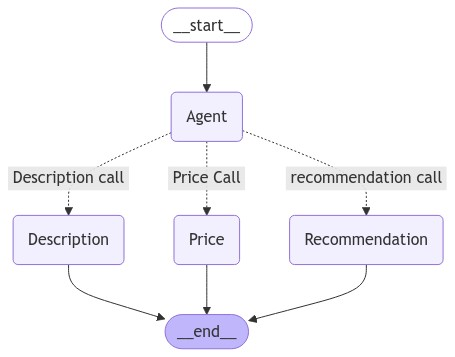

In [179]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [351]:
input = {"messages":["recommend a 3-bedroom house in New York for under $600,000."]}
result = app.invoke(input)

In [352]:
# Print the last item from the 'messages' list
last_message = result['messages'][-1]  # Access the last item in the list
print(last_message)

This spacious 1.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $250000.0.
Price: $250000.0

This spacious 2.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $275000.0.
Price: $275000.0

This spacious 2.0-bed, 1.0-bath home in New York features a 600.0 sqft lot and is listed for $125000.0.
Price: $125000.0


